In [10]:
# -*- coding: utf-8 -*-
"""
Created on Mon Mar 13 21:44:58 2017

@author: imtiaz
"""

#Importing required python packages
import pandas as pd
from matplotlib import pyplot
import numpy as np
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
import seaborn as sns
%matplotlib inline

In [2]:
AirFares=pd.read_excel('Airfares.xls','data')
AirFares.describe()

,COUPON,NEW,HI,S_INCOME,E_INCOME,S_POP,E_POP,DISTANCE,PAX,FARE
count,638.000000,638.000000,638.000000,638.000000,638.000000,6.380000e+02,6.380000e+02,638.000000,638.000000,638.000000
mean,1.202335,2.753918,4442.141218,27759.860502,27663.727273,4.557004e+06,3.194503e+06,975.653605,12782.214734,160.876677
std,0.203821,0.760448,1724.266962,3596.207837,4611.325018,3.010985e+06,2.735604e+06,646.242403,13202.228860,76.022436
min,1.000000,0.000000,1230.483840,14600.000000,14600.000000,2.983800e+04,1.117450e+05,114.000000,1504.000000,42.470000
25%,1.040000,3.000000,3090.136621,24706.000000,23903.000000,1.862106e+06,1.228816e+06,455.000000,5328.500000,106.290000
50%,1.150000,3.000000,4208.183286,28637.000000,26409.000000,3.532657e+06,2.195215e+06,850.000000,7792.000000,144.600000
75%,1.297500,3.000000,5480.572518,29693.500000,31981.000000,7.830332e+06,4.549784e+06,1306.250000,14090.500000,209.350000
max,1.940000,3.000000,10000.000000,38813.000000,38813.000000,9.056076e+06,9.056076e+06,2764.000000,73892.000000,402.020000


In [4]:
#1.       S_CODE: starting airport’s code
#2.       S_CITY: starting city
#3.       E_CODE: ending airport’s code
#4.       E_CITY: ending city
#5.       COUPON: average number of coupons (a one-coupon flight is a non-stop flight, a two-coupon flight is a one stop flight, etc.) for that route
#6.       NEW: number of new carriers entering that route between Q3-96 and Q2-97
#7.       VACATION: whether a vacation route (Yes) or not (No); Florida and Las Vegas routes are generally considered vacation routes
#8.       SW: whether Southwest Airlines serves that route (Yes) or not (No)
#9.       HI: Herfindel Index – measure of market concentration (refer to BMGT 681)
#10.      S_INCOME: starting city’s average personal income
#11.      E_INCOME: ending city’s average personal income
#12.      S_POP: starting city’s population
#13.      E_POP: ending city’s population
#14.      SLOT: whether either endpoint airport is slot controlled or not; this is a measure of airport congestion
#15.      GATE: whether either endpoint airport has gate constraints or not; this is another measure of airport congestion
#16.      DISTANCE: distance between two endpoint airports in miles
#17.      PAX: number of passengers on that route during period of data collection
#18.      FARE: average fare on that route


In [5]:
#Splitting into train and test data
msk = np.random.rand(len(AirFares)) < 0.8
Airfares_train=AirFares[msk]
Airfares_test=AirFares[~msk]



In [6]:
AirFares.shape


(638, 18)

In [7]:
Airfares_train.shape


(495, 18)

In [8]:
Airfares_test.shape

(143, 18)

C:\Program Files\Anaconda3\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


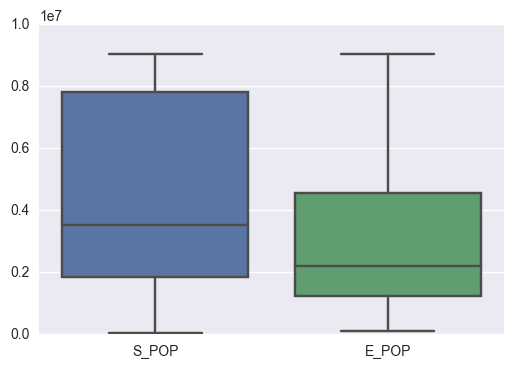

In [12]:

sns.boxplot(Airfares_train[['S_POP','E_POP']])  #These two values are in one range



C:\Program Files\Anaconda3\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


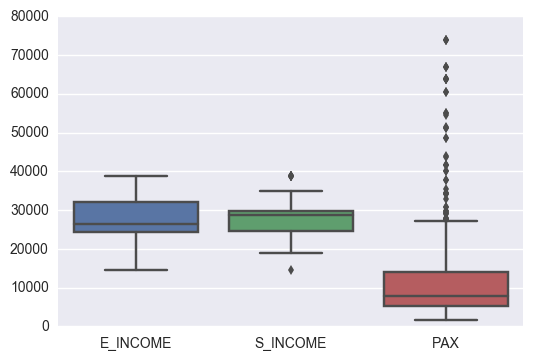

In [13]:
sns.boxplot(Airfares_train[['E_INCOME','S_INCOME', 'PAX']]) # These two values are 


C:\Program Files\Anaconda3\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


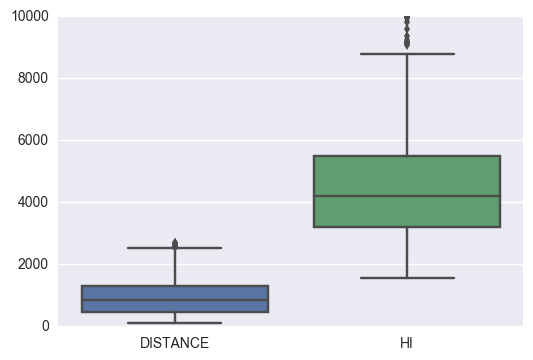

In [15]:
sns.boxplot(Airfares_train[['DISTANCE','HI']])


C:\Program Files\Anaconda3\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


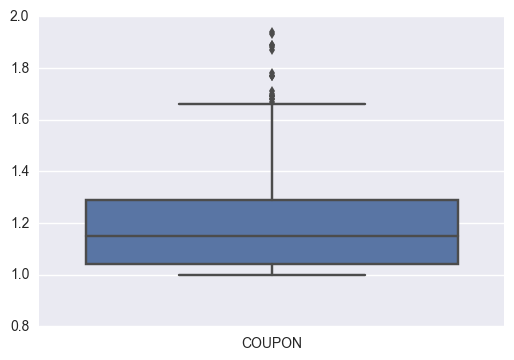

In [16]:
sns.boxplot(Airfares_train[['COUPON']])

In [17]:
#NEW ,Slot, creating dummy variables for the NEW column
d=pd.get_dummies(Airfares_train.NEW)
d.columns=['NEW_0','NEW_1','NEW_2','NEW_3']
Airfares_train=pd.concat([Airfares_train,d],axis=1)
Airfares_train.describe()
Airfares_train['SLOT']=Airfares_train['SLOT'].astype('category')

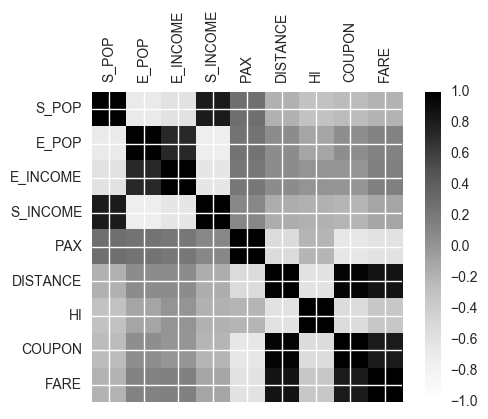

In [18]:
Airfares_trainCorrelation=Airfares_train[['S_POP','E_POP','E_INCOME','S_INCOME', 'PAX','DISTANCE','HI','COUPON','FARE']].corr()
#Multivariate plots : Scatter plot matrix
correlations = Airfares_trainCorrelation.corr()
# plot correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(Airfares_trainCorrelation.columns,rotation=90)
ax.set_yticklabels(Airfares_trainCorrelation.columns)
pyplot.show()

In [19]:
# Which variables are correlated?
#S_POP is positively correlated with S_INCOME
#Distance is positiveley correlated with  coupon
#E_POP is positively correlated with E_INCOME
#COUPON,is positively correlated with Distance

In [20]:
#Regression Diagonistics
#Linearity and Normality assumptions
#Normal probability plot of the standard residuals  : If the residuals are normally distributed
#the ordered residuals should be approximately the same as the ordered normalscores. The plot
#of this two should resemble a straight line under normality assumption


In [22]:
regressionModel1=smf.ols('FARE~S_POP+E_POP+E_INCOME+S_INCOME+PAX+DISTANCE+HI+COUPON+NEW_0+NEW_1+NEW_2+NEW_3+SLOT',data=Airfares_train).fit()
regressionModel1.summary()

ModelInput=Airfares_train[['S_POP','E_POP','E_INCOME','S_INCOME', 'PAX','DISTANCE','HI','NEW_0','NEW_1','NEW_2','NEW_3','SLOT']]


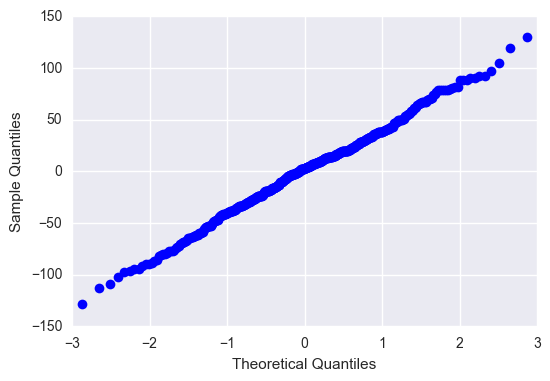

In [23]:
import statsmodels.api as sm
probplot = sm.ProbPlot(regressionModel1.resid)
probplot.qqplot()
pyplot.show()


<Container object of 3 artists>

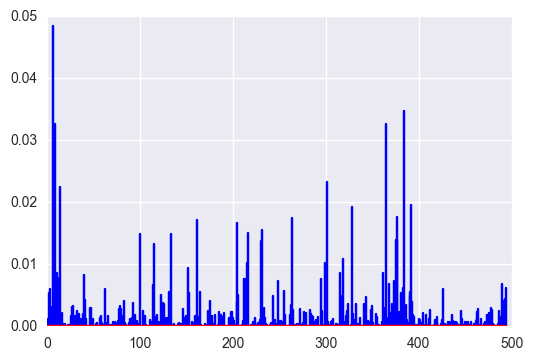

In [24]:
#Influential diagnostics
#influential observations detection
influence = regressionModel1.get_influence()
(c, p) = influence.cooks_distance
pyplot.stem(np.arange(len(c)), c, markerfmt=",")

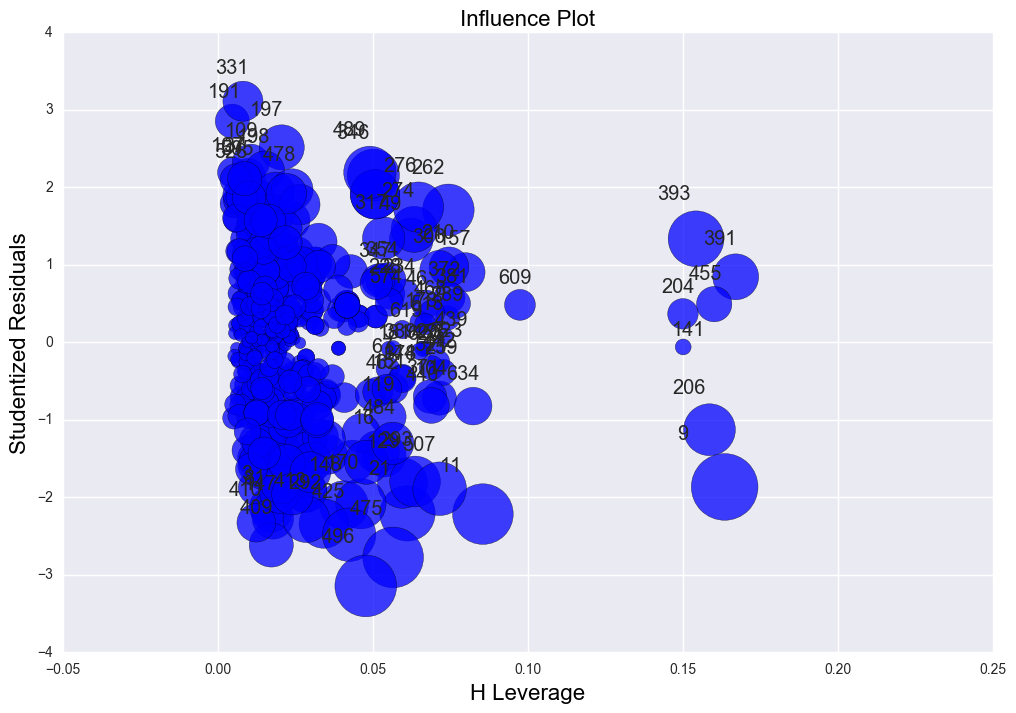

In [25]:
fig, ax = pyplot.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(regressionModel1, ax=ax, criterion="cooks")
pyplot.show()

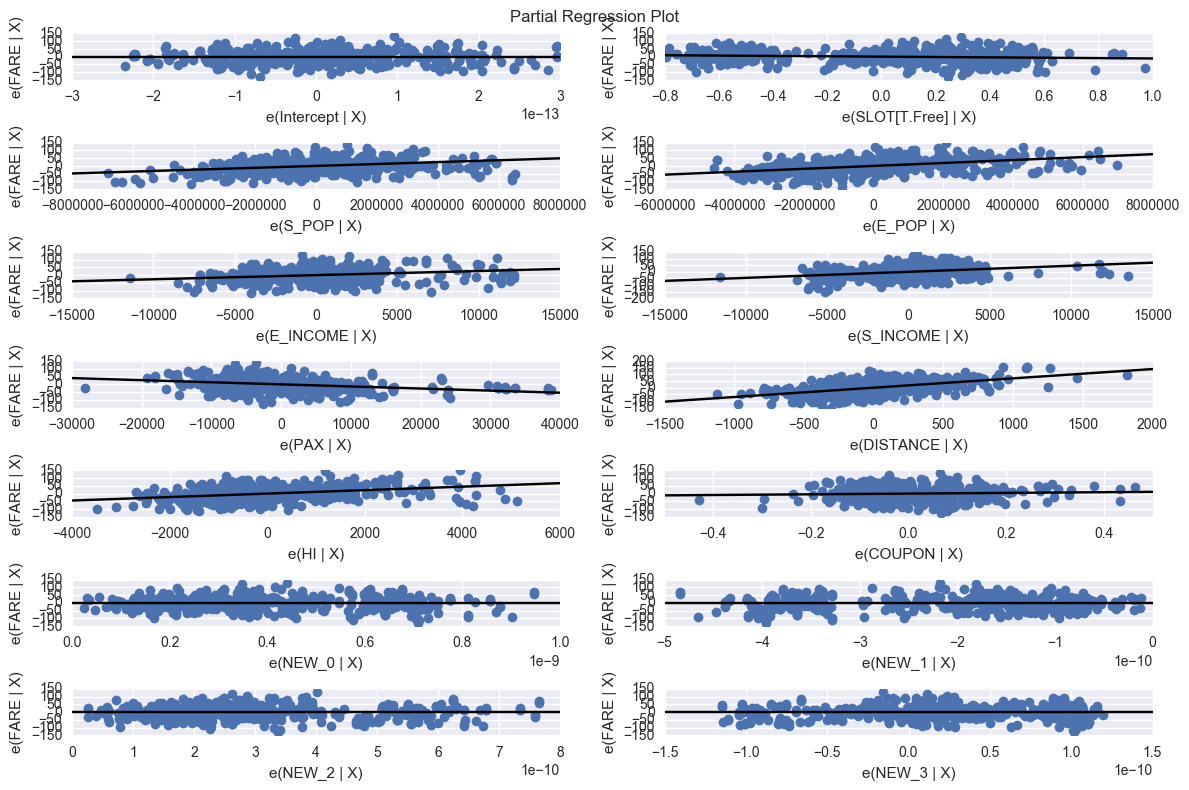

In [28]:
#Partial Regression  Plots
fig = pyplot.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(regressionModel1, fig=fig)

In [29]:
regressionModel1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   FARE   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     94.81
Date:                Tue, 14 Mar 2017   Prob (F-statistic):          1.70e-118
Time:                        07:32:51   Log-Likelihood:                -2549.7
No. Observations:                 495   AIC:                             5125.
Df Residuals:                     482   BIC:                             5180.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept     -169.4958     25.330     -6.692      0.000      -219.266  -119.726
SLOT[T.Free]   -11.6031      4.834     -2.400      0.017       -21.102    -2.104
S_POP         6.107e-06   8.34e-07      7.325      0.000      4.47e-06  7.74e-06
E_POP         9.426e-06   9.13e-07     10.321      0.000      7.63e-06  1.12e-05
E_INCOME         0.0027      0.000      5.347      0.000         0.002     0.004
S_INCOME         0.0046      0.001      7.108      0.000         0.003     0.006
PAX             -0.0013      0.000     -6.820      0.000        -0.002    -0.001
DISTANCE         0.0701      0.005     14.230      0.000         0.060     0.080
HI               0.0112      0.001      8.681      0.000         0.009     0.014
COUPON          22.6564     17.342      1.306      0.192       -11.419    56.731
NEW_0          -43.2759      9.872     -4.384      0.000       -62.673   -23.879
NEW_1          -46.8299     10.904     -4.295      0.000       -68.255   -25.404
NEW_2          -32.3059     14.997     -2.154      0.032       -61.774    -2.838
NEW_3          -47.0840      7.727     -6.094      0.000       -62.266   -31.902
==============================================================================
Omnibus:                        0.705   Durbin-Watson:                   1.181
Prob(Omnibus):                  0.703   Jarque-Bera (JB):                0.541
Skew:                          -0.064   Prob(JB):                        0.763
Kurtosis:                       3.100   Cond. No.                     8.44e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.62e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""